In [50]:
import os
import pandas as pd

current_dir = os.getcwd()
path_file = os.path.join(current_dir, "datasets/kddcup")
columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
'num_compromised', 'root_shell', 'su_attemped', 'num_root',
'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'label']
df = pd.read_csv(path_file, names=columns, index_col=None)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [51]:
df.shape

(4898431, 42)

In [52]:
df = df[df['service'] == 'http']
df = df.drop('service', axis = 1)
columns.remove('service')
df.shape

(623091, 41)

In [53]:
df['label'].value_counts()

label
normal.       619046
back.           2203
neptune.        1801
portsweep.        16
ipsweep.          13
satan.             7
phf.               4
nmap.              1
Name: count, dtype: int64

In [54]:
from sklearn.preprocessing import LabelEncoder

for col in df.columns:
    if df[col].dtype == 'object':
        encoded = LabelEncoder()
        encoded.fit(df[col])
        df[col] = encoded.transform(df[col])

In [55]:
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,0,9,215,45076,0,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,4
1,0,0,9,162,4528,0,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,4
2,0,0,9,236,1228,0,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,4
3,0,0,9,233,2032,0,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,4
4,0,0,9,239,486,0,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,4


In [56]:
import numpy as np
for f in range(0,3):
    df = df.iloc[np.random.permutation(len(df))]

In [57]:
X = df[:500000]
y = X['label']

In [58]:
X.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
4807016,0,0,9,189,1274,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,4
21914,0,0,9,284,1043,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,4
1440170,0,0,1,0,0,0,0,0,0,0,...,42,1.00,0.00,0.06,0.26,0.0,0.0,1.0,1.0,4
357095,1,0,9,334,284,0,0,0,0,0,...,244,0.96,0.01,0.00,0.00,0.0,0.0,0.0,0.0,4
784466,0,0,9,220,337,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,4


In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [60]:
X_train.shape

(400000, 41)

In [61]:
y_train.shape

(400000,)

In [62]:
X_test.shape

(100000, 41)

In [63]:
y_test.shape

(100000,)

In [64]:
df_validate = df[500000:]

In [65]:

X_val, y_val = df_validate, df_validate['label']

In [66]:
X_val.shape

(123091, 41)

In [67]:
y_val.shape

(123091,)

In [68]:
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(n_estimators = 100,
                                   max_samples = 256,
                                   contamination = 0.1,
                                   random_state = 42)

In [69]:
isolation_forest.fit(X_train)

IsolationForest(contamination=0.1, max_samples=256, random_state=42)

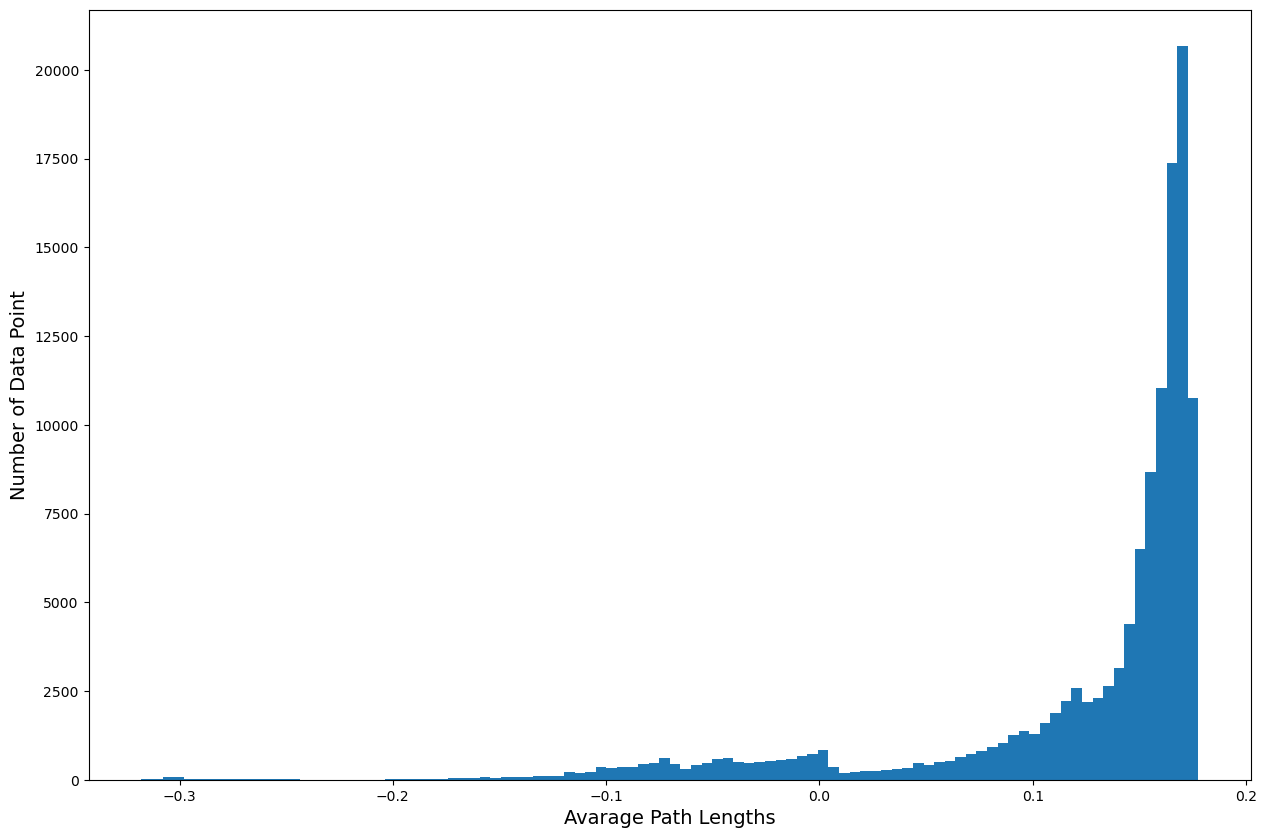

In [70]:
import matplotlib.pyplot as plt

anomaly_scores = isolation_forest.decision_function(X_val)
plt.figure(figsize=(15, 10))
plt.hist(anomaly_scores, bins = 100)
plt.xlabel('Avarage Path Lengths', fontsize = 14)
plt.ylabel('Number of Data Point', fontsize = 14)
plt.show()

In [71]:
from sklearn.metrics import roc_auc_score

anomalies = anomaly_scores > -0.19
matches = y_val == list(encoded.classes_).index('normal.')
auc = roc_auc_score(anomalies, matches)
print('AUC: {:.2%}'.format(auc))

AUC: 95.10%


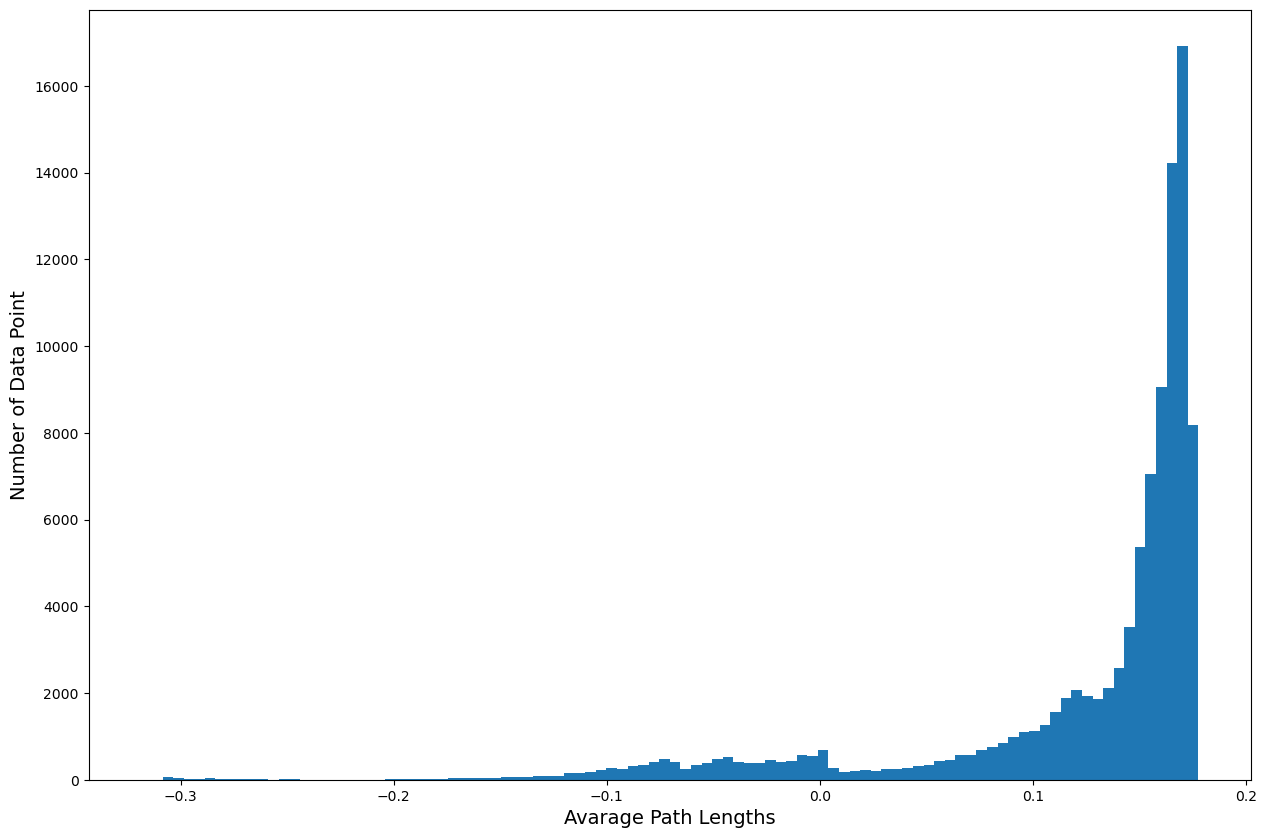

In [72]:
anomaly_scores_test = isolation_forest.decision_function(X_test)
plt.figure(figsize=(15, 10))
plt.hist(anomaly_scores_test, bins = 100)
plt.xlabel('Avarage Path Lengths', fontsize = 14)
plt.ylabel('Number of Data Point', fontsize = 14)
plt.show()

In [73]:
anomalies_test = anomaly_scores_test > -0.19
matches = y_test == list(encoded.classes_).index('normal.')
auc = roc_auc_score(anomalies_test, matches)
print('AUC: {:.2%}'.format(auc))

AUC: 94.00%
